**Capstone**

Project: Capstone Notebook: part 1 of 2

Next Notebook: part 2 - Modeling

### Introduction
Heart disease is one of the leading causes of death in North America. According to American CDC, cardiovascular diseases cause 1 in 3 deaths or more than 859,000 people each year, resulting in 216 billion dollars in health care system costs and 147 billion dollars in lost productivity on the job from premature death. In a clinical setting, chest pain, ECG, cardiac enzymes(CK-MB), and Cardiac computed tomographic angiography are helpful to diagnose heart disease. However, little do we know about the risk factors except for hyperlipidemia and hypertension. Detecting the risk factors for the sake of preventing heart disease in advance is pivotal for society and families. 

We are going to explore the data from American CDC to uncover the key indicators of heart disease with both supervised learning and unsupervised learning. The dataset can be obtained from [CDC:Behavioral Risk Factor Surveillance System(BRFSS)](https://www.cdc.gov/brfss/annual_data/annual_2020.html), companied by a codebook. Every year, the officers from CDC conduct annual telephone surveys to gather data on the health status of the U.S residents.As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world." At the time of this research, this is the latest dataset. The dataset from CDC is encoded by SAS in the XPT format and I import into SPSS and transform it into a csv file. The original dataset includes about 300 variables and 40,000 rows. 

The report will start by importing the dataset and preprocessing the data which will primarily consist of removing null values and duplicates. The next step is to conduct a basic Exploratory Data Analysis(EDA) to understand the target and features. The target is binary(1 - respondent had heart disease; 0 - respondent had no heart disease). In part two of the project, as the dataset is imbalanced, we will get a baseline of the original cleaned data and  sample the cleaned data with upsampling, downsampling and SMOTE. Then we will build supervised learning models(Logistic Regression, DecisionTree, KNN, SVM, RandomForestTree). We'll evaluate the data not only on accuracy but also on recall, ROC and AUC and optimize the hyperparameters.  Finally, we will apply unsupervised learning to get a better understanding of the data. 


### Importing
The first step is to import modules and libraries which will be used throughout this notebook.

In [1]:
# Import relevant libraries and modules which will be utilized in the overall report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Hide warnings that appear with logistic regression without updating Scikit-learn
import warnings
warnings.filterwarnings('ignore')

The dataset from CDC is encoded by SAS in the XPT format and I import into SPSS and transform it into a csv file. Now we can start with the lovely csv file.

In [2]:
# Read in the csv to a DataFrame
df = pd.read_csv("D:/BrainStation/datasets/heart disease.csv",na_values=' ')
# Set na_values to ' ' as there are blanks in the dataset

### Exploring the Dataset
The broad exploration of the dataset will now be conducted by looking at the data and its structure. First, the .info() function will be used to get a concise summary of the dataframe and the .shape() function will be used to identify the rows and columns of the data. We will visualize some rows of the dataframe by .head() function. 

In [3]:
# Get a concise summary of the dataframe and check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Columns: 279 entries, @_STATE to @_AIDTST4
dtypes: float64(234), int64(45)
memory usage: 855.6 MB


The `df` contains 279 columns and 401957 rows. The data types for the columns consist of float and integer. 

In [4]:
df.shape
# Print out the shape of the df 
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.')

There are 401958 rows and 279 columns in the dataframe.


In [5]:
# Visualize the first few rows of the dataframe
df.head()

,@_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,@_PSU,CTELENM1,...,@_RFPSA23,@_CLNSCPY,@_SGMSCPY,@_SGMS10Y,@_RFBLDS4,@_STOLDNA,@_VIRCOLN,@_SBONTIM,@_CRCREC1,@_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


Now we'll check for any duplicate rows and total null values for `df`.

In [6]:
# Check for the duplicated rows
df.duplicated().sum()

0

No duplicated rows in the columns.

In [7]:
# Displaying the sum of null rows in each column
df.isna().sum()

@_STATE           0
FMONTH            0
IDATE             0
IMONTH            0
IDAY              0
              ...  
@_STOLDNA    225601
@_VIRCOLN    227684
@_SBONTIM    207741
@_CRCREC1    226260
@_AIDTST4     34037
Length: 279, dtype: int64

In [8]:
# Displaying the sum of null rows in each column
df.isna().sum().sum()

51293905

The `df` consists of plenty of null values. We'll explore the percentage of null values of each column.

In [9]:
# Check the percentage of nulls and sort them by percengtage
(df.isnull().sum() / df.shape[0] * 100.00).round(2).sort_values(ascending=False)

TOLDCFS      100.00
HAVECFS      100.00
WORKCFS      100.00
COLGSEX       99.99
COLGHOUS      99.99
              ...  
@_LLCPWT       0.00
@_LLCPWT2      0.00
CVDCRHD4       0.00
@_DUALUSE      0.00
@_STATE        0.00
Length: 279, dtype: float64

Some columns are totally blank. We set a threshold of 0.4 of the percentage of null values and will keep the columns if the null values percentage is below 0.4.

In [10]:
# Delete the columns which null values account for more than 40%
df = df.loc[:, df.isnull().mean() < .4]
df

,@_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,@_PSU,SAFETIME,...,@_RFSMOK3,DRNKANY5,DROCDY3_,@_RFBING5,@_DRNKWK1,@_RFDRHV7,@_RFSEAT2,@_RFSEAT3,@_DRNKDRV,@_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,NaN,...,2,2,0,1,0,1,1,1,9,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,NaN,...,9,9,900,9,99900,9,9,9,9,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,NaN,...,1,2,0,1,0,1,1,1,9,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,NaN,...,1,2,0,1,0,1,1,1,9,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,NaN,...,1,2,0,1,0,1,1,1,9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72,11,2192021,2,19,2021,1100,2020004940,2020004940,1.0,...,1,2,0,1,0,1,1,1,9,1.0
401954,72,11,2142021,2,14,2021,1100,2020004941,2020004941,1.0,...,1,2,0,1,0,1,1,1,9,1.0
401955,72,11,2142021,2,14,2021,1100,2020004942,2020004942,1.0,...,1,2,0,1,0,1,1,1,9,2.0
401956,72,11,3172021,3,17,2021,1100,2020004943,2020004943,1.0,...,9,1,14,1,200,1,1,1,2,1.0


Check the percentage of null values of the new dataframe and visualize it.

In [11]:
# Calculate percentage of null values
df_null_percentage =(df.isnull().sum() / df.shape[0] * 100.00).round(2).sort_values(ascending=False)
df_null_percentage

VIRCOLON    36.19
STOOLDNA    36.05
BLDSTOL1    35.92
SIGMSCPY    35.81
COLNSCPY    35.68
            ...  
@_PSU        0.00
SEXVAR       0.00
GENHLTH      0.00
PHYSHLTH     0.00
@_STATE      0.00
Length: 129, dtype: float64

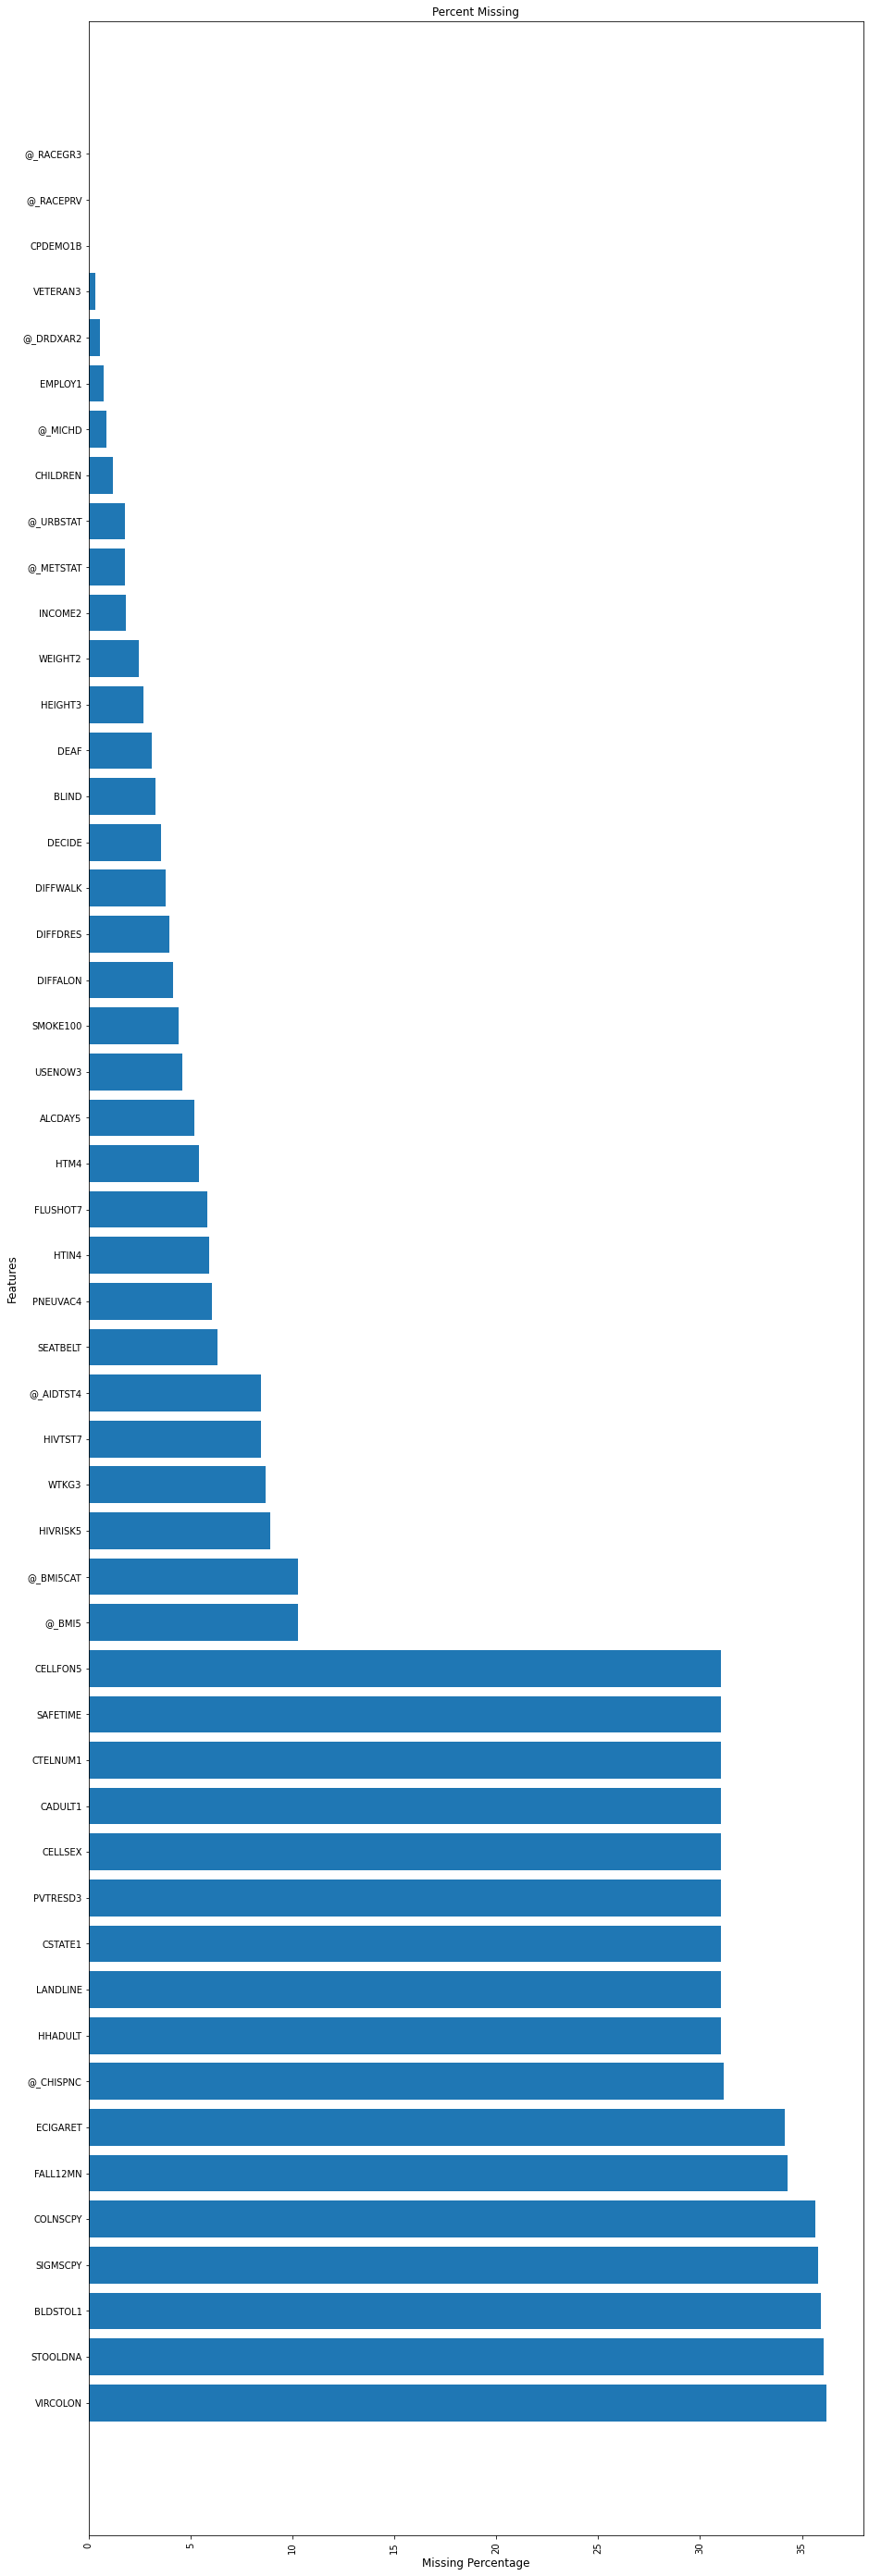

In [12]:
# Plot 50 columns with the highest null values percentage
plt.figure(figsize=(15,50))
plt.barh(df_null_percentage.index[:50], df_null_percentage.values[:50])
plt.title('Percent Missing')
plt.ylabel('Features', fontsize=12)
plt.xlabel('Missing Percentage', fontsize=12)
plt.xticks(rotation=90)
plt.show()

There are about 50 columns with null value. So we'll check the columns' meaning with the codebook from the CDC and decide which columns should be kept. Applying `df.columns.to_list()` to get the columns name. 

In [13]:
# print the list of the columns name
print(df.columns.to_list())

['@_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '@_PSU', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX', 'PVTRESD3', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'HAVARTH4', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'LASTDEN4', 'RMVTETH4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ALCDAY5', 'FLUSHOT7', 'PNEUVAC4', 'FALL12MN', 'SEATBELT', 'COLNSCPY', 'SIGMSCPY', 'BLDSTOL1', 'STOOLDNA', 'VIRCOLON', 'HIVTST7', 'HIVRISK5', 'ECIGARET', 'QSTVER', 'QSTLANG', '@_METSTAT', '@_URBSTAT', '@_STSTR', '@_STRWT', '@_RAWRAKE', '@_WT2RAKE', '@_IMPRACE', '@_CHISPNC', '@_DUALUSE', '@_LLCPWT2', '@_LLCPWT', '@_RFHLTH', '@_PHYS14D', '

### Data Selection

So I check the column names above one by one and get the meaning of the columns from the codebook. From the codebook,we can see they are two columns indicate the outcome of heart disease: `CVDCRHD4` and `@_MICHD`. 

`CVDCRHD4` (Ever told) (you had) angina or coronary heart disease? 

Value 1  Yes

Value 2  No

Value 7 Don't know/Not sure

Value 9 Refused


`@_MICHD`
Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

Value 1:  Reported having MI or CHD  

Value 2:  Did not report having MI or CHD  

Value BLANK:   Not asked or Missing

In this case, We keep `@_MICHD` as it's simple and easy to understand. After dropping the blank we can get the binary class. 

In [14]:
# Define the target
outcome = df[["@_MICHD",'CVDCRHD4']]
outcome 

,@_MICHD,CVDCRHD4
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0
...,...,...
401953,2.0,2.0
401954,2.0,2.0
401955,2.0,2.0
401956,2.0,2.0


Next, I check the columns related to height and weight. The following is the meaning of the columns' name and value.

`HEIGHT3`:  About how tall are you without shoes? (If respondent answers in metrics, put a 9 in the first column)[Round fractions down.]

Value 200 - 711: Height (ft/inches)

Value 7777 : Don’t know/Not sure

Value 9061 - 9998: Height (meters/centimeters)

Value 9999: Refused

`HTM4`: Reported height in meters

Value 91 - 244: Height in meters [2 implied decimal places]

Value BLANK: Don't know/Refused/Not asked or Missing


`HTIN4`: Reported height in inches

Value 36 - 95: Height in inches

Value BLANK: Don't know/Refused/Not asked or Missing

`WTKG3`: Reported weight in kilograms

Value 2300 - 29500: Weight in kilograms[2 implied decimal places]

Value BLANK: Don't know/Refused/Not asked or Missing

`WEIGHT2`: About how much do you weigh without shoes? (If respondent answers in metrics, put a 9 in the first column)[Round fractions up.]

Value 50 - 0776: Weight (pounds)

Value 7777 : Don’t know/Not sure

Value 9023 - 9352: Weight (kilograms)

Value 9999: Refused

Value blank: Not asked or missing

In this case, I select `HTM4` and `WTKG3` as our features, as "meter" and "kg" are international standard units and easy to understand.

In the following steps, I check the meaning of columns' name and value with the codebook one by one and select the features. The principle of the selection is keep as much information as possible. In other words, the more granular, the better. Some columns, like `@_STATE`, `FMONTH`, `LANDLINE` and `SEATBELT`, have nothing to do with heart disease, so I drop them directly. Some columns like `STOOLDNA`(stool DNA) and `_AIDTST4`(HIV test), in my opinion, don't relate to heart disease and I drop them straightforwardly. Even though I have some experience in health, I may be wrong and the dropping may result in some selection bias. I will add these features if the models can't explain the result perfectly.  

In [15]:
Height_weight = df[["HEIGHT3","HTM4","HTIN4","WTKG3","WEIGHT2"]]   # Choose 'HTM4' and 'WTKG3'
Height_weight

,HEIGHT3,HTM4,HTIN4,WTKG3,WEIGHT2
0,507.0,170.0,67.0,4808.0,106.0
1,504.0,163.0,64.0,7711.0,170.0
2,508.0,173.0,68.0,NaN,7777.0
3,9999.0,NaN,NaN,NaN,9999.0
4,506.0,168.0,66.0,5715.0,126.0
...,...,...,...,...,...
401953,411.0,150.0,59.0,5443.0,120.0
401954,500.0,152.0,60.0,7620.0,168.0
401955,401.0,124.0,49.0,7212.0,159.0
401956,508.0,173.0,68.0,7938.0,175.0


In [16]:
smoke = df[["SMOKE100","@_RFSMOK3","@_SMOKER3","ECIGARET","USENOW3"]]   # Select @_SMOKER3
smoke 

,SMOKE100,@_RFSMOK3,@_SMOKER3,ECIGARET,USENOW3
0,1.0,2,1,1.0,3.0
1,NaN,9,9,NaN,NaN
2,2.0,1,4,2.0,3.0
3,2.0,1,4,2.0,3.0
4,2.0,1,4,2.0,3.0
...,...,...,...,...,...
401953,2.0,1,4,NaN,3.0
401954,2.0,1,4,NaN,3.0
401955,2.0,1,4,NaN,3.0
401956,7.0,9,9,NaN,3.0


In [17]:
BMI = df[['@_BMI5', '@_BMI5CAT','@_RFBMI5']]   # Choose @_BMI5, because it's a continuous variable, while @_BMI5CAT is a categorical variable 
BMI

,@_BMI5,@_BMI5CAT,@_RFBMI5
0,1660.0,1.0,1
1,2918.0,3.0,2
2,NaN,NaN,9
3,NaN,NaN,9
4,2034.0,2.0,1
...,...,...,...
401953,2424.0,2.0,1
401954,3281.0,4.0,2
401955,4656.0,4.0,2
401956,2661.0,3.0,2


In [18]:
drink = df[['@_RFDRHV7','DROCDY3_','@_DRNKWK1','ALCDAY5','@_RFBING5','DRNKANY5']]
drink  # Choose @_RFDRHV7, because it's binary 

,@_RFDRHV7,DROCDY3_,@_DRNKWK1,ALCDAY5,@_RFBING5,DRNKANY5
0,1,0,0,888.0,1,2
1,9,900,99900,NaN,9,9
2,1,0,0,888.0,1,2
3,1,0,0,888.0,1,2
4,1,0,0,888.0,1,2
...,...,...,...,...,...,...
401953,1,0,0,888.0,1,2
401954,1,0,0,888.0,1,2
401955,1,0,0,888.0,1,2
401956,1,14,200,101.0,1,1


In [19]:
sex =df[["@_SEX","SEXVAR","CELLSEX"]]  # Choose @_SEX
sex

,@_SEX,SEXVAR,CELLSEX
0,2,2,NaN
1,2,2,NaN
2,2,2,NaN
3,2,2,NaN
4,2,2,NaN
...,...,...,...
401953,2,2,2.0
401954,2,2,2.0
401955,2,2,2.0
401956,1,1,1.0


In [20]:
arthritis =df[["@_DRDXAR2","HAVARTH4"]] # Choose @_DRDXAR2
arthritis

,@_DRDXAR2,HAVARTH4
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0
4,2.0,2.0
...,...,...
401953,2.0,2.0
401954,2.0,2.0
401955,2.0,2.0
401956,2.0,2.0


In [21]:
age = df[['@_AGEG5YR','@_AGE80','@_AGE_G']]  # Choose @_AGE80, it's continuous. Others are categorical
age

,@_AGEG5YR,@_AGE80,@_AGE_G
0,8,56,5
1,10,65,6
2,10,65,6
3,13,80,6
4,13,80,6
...,...,...,...
401953,6,45,4
401954,2,29,2
401955,13,80,6
401956,8,58,5


In [22]:
exercise= df[["@_TOTINDA","EXERANY2","@_PHYS14D"]]    # Choose @_TOTINDA
exercise

,@_TOTINDA,EXERANY2,@_PHYS14D
0,1,1.0,2
1,1,1.0,1
2,1,1.0,1
3,2,2.0,1
4,1,1.0,1
...,...,...,...
401953,1,1.0,1
401954,2,2.0,1
401955,1,1.0,1
401956,1,1.0,1


In [23]:
race= df[['@_RACEPRV','@_RACEGR3','@_RACEG21','@_RACE','@_MRACE1','@_PRACE1','@_IMPRACE']] # Choose @_IMPRACE
race

,@_RACEPRV,@_RACEGR3,@_RACEG21,@_RACE,@_MRACE1,@_PRACE1,@_IMPRACE
0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,2.0,2.0,2.0,2.0,2.0,2.0,2
2,2.0,2.0,2.0,2.0,2.0,2.0,2
3,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...
401953,8.0,5.0,2.0,8.0,1.0,1.0,5
401954,8.0,5.0,2.0,8.0,6.0,6.0,5
401955,8.0,5.0,2.0,8.0,1.0,1.0,5
401956,8.0,5.0,2.0,8.0,1.0,1.0,5


In [24]:
income = df[["@_INCOMG","INCOME2"]] # Choose INCOME2 , it's more granular than @_INCOMG
income

,@_INCOMG,INCOME2
0,1,1.0
1,9,99.0
2,5,7.0
3,9,99.0
4,9,77.0
...,...,...
401953,9,99.0
401954,2,4.0
401955,1,1.0
401956,9,99.0


In [25]:
urbanstate =df[["@_METSTAT","@_URBSTAT"]]   # Choose @_URBSTAT first
urbanstate

,@_METSTAT,@_URBSTAT
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
401953,NaN,NaN
401954,NaN,NaN
401955,NaN,NaN
401956,NaN,NaN


In [26]:
asthma = df[['@_ASTHMS1','@_CASTHM1','ASTHMA3']]  # Choose ASTHMA3
asthma

,@_ASTHMS1,@_CASTHM1,ASTHMA3
0,1,2,1.0
1,2,1,1.0
2,3,1,2.0
3,3,1,2.0
4,3,1,2.0
...,...,...,...
401953,3,1,2.0
401954,3,1,2.0
401955,3,1,2.0
401956,3,1,2.0


In [27]:
mental_health_problem = df[['@_MENT14D','ADDEPEV3','MENTHLTH']]   # Choose ADDEPEV3
mental_health_problem

,@_MENT14D,ADDEPEV3,MENTHLTH
0,3,1.0,30.0
1,1,1.0,88.0
2,1,2.0,88.0
3,1,2.0,88.0
4,1,2.0,88.0
...,...,...,...
401953,1,1.0,88.0
401954,1,2.0,88.0
401955,1,2.0,88.0
401956,1,2.0,88.0


In [28]:
related_disease = df[['CHCCOPD2','DIABETE4','CHCKDNY2','HAVARTH4','CHCOCNCR','CVDSTRK3']] 
related_disease
# These diseases only have one column in the dataset, so we'll keep all of them.

,CHCCOPD2,DIABETE4,CHCKDNY2,HAVARTH4,CHCOCNCR,CVDSTRK3
0,1.0,1.0,2.0,1.0,1.0,2.0
1,2.0,3.0,2.0,1.0,2.0,2.0
2,2.0,3.0,2.0,1.0,1.0,2.0
3,2.0,3.0,2.0,2.0,2.0,2.0
4,2.0,3.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...
401953,2.0,3.0,2.0,2.0,2.0,2.0
401954,2.0,3.0,2.0,2.0,2.0,2.0
401955,2.0,3.0,2.0,2.0,2.0,2.0
401956,2.0,3.0,2.0,2.0,2.0,2.0


In [29]:
sleep = df[['SLEPTIM1']] # Lucily, only one column is related to sleep
sleep

,SLEPTIM1
0,5.0
1,7.0
2,7.0
3,6.0
4,7.0
...,...
401953,6.0
401954,12.0
401955,8.0
401956,6.0


In [30]:
education =df[['EDUCA']] # Lucily, only one column is related to education
education

,EDUCA
0,6.0
1,6.0
2,5.0
3,4.0
4,6.0
...,...
401953,5.0
401954,3.0
401955,4.0
401956,6.0


In [31]:
physical_health = df[['PHYSHLTH']]  # Lucily, only one column is related to physical health
physical_health

,PHYSHLTH
0,3.0
1,88.0
2,88.0
3,88.0
4,88.0
...,...
401953,88.0
401954,88.0
401955,88.0
401956,88.0


Finally, the following columns are fortunately selected as the representatives to demonstrate their talents.

`variable = ['@_MICHD','HTM4', 'WTKG3', '@_SMOKER3', '@_BMI5','@_RFDRHV7', '@_SEX', '@_AGE80', '@_DRDXAR2', '@_IMPRACE', '@_TOTINDA', 'INCOME2', '@_URBSTAT', 'ASTHMA3', 'ADDEPEV3', 'SLEPTIM1', 'EDUCA', 'CHCCOPD2', 'DIABETE4', 'CHCKDNY2', 'CHCOCNCR', 'CVDSTRK3', 'PHYSHLTH']`


#### Rename the variables

In [32]:
# Put the variables in a list
variables = ['@_MICHD','@_SEX','@_AGE80','@_IMPRACE','HTM4', 'WTKG3','@_BMI5','@_SMOKER3','@_RFDRHV7','INCOME2','EDUCA','@_URBSTAT',
            '@_TOTINDA','PHYSHLTH','ADDEPEV3','SLEPTIM1','@_DRDXAR2','ASTHMA3','CHCCOPD2','DIABETE4','CHCKDNY2','CHCOCNCR','CVDSTRK3']
df= df[variables]
# Rename the variables
df= df.rename(columns={'@_MICHD': 'Heart_disease',
                        '@_SEX':'Sex',
                       '@_AGE80':'Age',
                       '@_IMPRACE':'Race',
                       'HTM4':'Height',
                       'WTKG3':'Weight',
                       '@_BMI5':'BMI',
                       '@_SMOKER3':'Smoker',
                       '@_RFDRHV7':'Heavy_drinker',
                       'INCOME2':'Income',
                        'EDUCA':'Education',
                       '@_URBSTAT':'Urban',
                       '@_DRDXAR2':'Arthritis',
                       '@_TOTINDA':'Physical_activity',
                       'PHYSHLTH':'Physical_unhealth_days',   
                       'ADDEPEV3':'Mental_health_problem',
                       'SLEPTIM1':'Sleep_time',
                      'ASTHMA3':'Asthma',
                       'CHCCOPD2':'COPD',
                       'DIABETE4':'Diabetes',
                       'CHCKDNY2':'Kidney_disease',
                       'CHCOCNCR':'Cancer',
                       'CVDSTRK3':'Stroke'
                       
})

In [33]:
# Check the head to confirm the success of rename 
df.head()

,Heart_disease,Sex,Age,Race,Height,Weight,BMI,Smoker,Heavy_drinker,Income,...,Physical_unhealth_days,Mental_health_problem,Sleep_time,Arthritis,Asthma,COPD,Diabetes,Kidney_disease,Cancer,Stroke
0,2.0,2,56,1,170.0,4808.0,1660.0,1,1,1.0,...,3.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
1,2.0,2,65,2,163.0,7711.0,2918.0,9,9,99.0,...,88.0,1.0,7.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0
2,2.0,2,65,2,173.0,NaN,NaN,4,1,7.0,...,88.0,2.0,7.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0
3,2.0,2,80,1,NaN,NaN,NaN,4,1,99.0,...,88.0,2.0,6.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
4,2.0,2,80,1,168.0,5715.0,2034.0,4,1,77.0,...,88.0,2.0,7.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0


### Cleaning the data

In the above precess, we've already removed duplicates columns and columns which are not relevant for the analysis.We know there isn't any duplicated rows in the columns(from the start `df.duplicated().sum()`). Now we're going to clean the data. The whole cleaning process is key to the data science workflow as it can ensure that the quality of the input data is up to par. After all, we are familiar with the old adage "Garbage in, garbage out" and that's what we're avoiding.

The data cleaning will start by checking the dataframe, datatypes and null values.

In [34]:
# Check the datatypes and nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Heart_disease           398387 non-null  float64
 1   Sex                     401958 non-null  int64  
 2   Age                     401958 non-null  int64  
 3   Race                    401958 non-null  int64  
 4   Height                  380227 non-null  float64
 5   Weight                  367010 non-null  float64
 6   BMI                     360601 non-null  float64
 7   Smoker                  401958 non-null  int64  
 8   Heavy_drinker           401958 non-null  int64  
 9   Income                  394600 non-null  float64
 10  Education               401946 non-null  float64
 11  Urban                   394831 non-null  float64
 12  Physical_activity       401958 non-null  int64  
 13  Physical_unhealth_days  401953 non-null  float64
 14  Mental_health_proble

In [35]:
# Check the null values
df.isna().sum()

Heart_disease              3571
Sex                           0
Age                           0
Race                          0
Height                    21731
Weight                    34948
BMI                       41357
Smoker                        0
Heavy_drinker                 0
Income                     7358
Education                    12
Urban                      7127
Physical_activity             0
Physical_unhealth_days        5
Mental_health_problem         6
Sleep_time                    3
Arthritis                  2303
Asthma                        3
COPD                          5
Diabetes                      6
Kidney_disease                6
Cancer                        3
Stroke                        3
dtype: int64

It seems that most columns have null values. We'll check the values and deal with the null values.

First, we'll address the `target("Heart_disease")`. The target values are 1( means heart disease ) or 2( no heart disease ). And there are 3571 null values, which is less than 1%. So I will drop the null values directly and reset the value from 2 to 0 to make the outcome binary.

In [36]:
# Drop the null values of the 'Heart_disease' columns
df = df.drop(df[df["Heart_disease"].isna()].index)
# Reset the value from 2 to 0
df.loc[df["Heart_disease"]==2,"Heart_disease"] = 0
# Confirm the reset works
df["Heart_disease"].value_counts()

0.0    364224
1.0     34163
Name: Heart_disease, dtype: int64

In [37]:
# Check the percentage of null values
(df.isnull().sum()/df.shape[0])*100

Heart_disease              0.000000
Sex                        0.000000
Age                        0.000000
Race                       0.000000
Height                     5.348568
Weight                     8.641848
BMI                       10.228747
Smoker                     0.000000
Heavy_drinker              0.000000
Income                     1.825110
Education                  0.002259
Urban                      1.780932
Physical_activity          0.000000
Physical_unhealth_days     0.000502
Mental_health_problem      0.000753
Sleep_time                 0.000000
Arthritis                  0.483198
Asthma                     0.000000
COPD                       0.000502
Diabetes                   0.000753
Kidney_disease             0.000753
Cancer                     0.000000
Stroke                     0.000000
dtype: float64

As our dataset have more 400,000 rows, it's safe to drop all the null values.

In [38]:
# Drop the null values of all columns
df_no_null = df.dropna()
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349294 entries, 0 to 394830
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Heart_disease           349294 non-null  float64
 1   Sex                     349294 non-null  int64  
 2   Age                     349294 non-null  int64  
 3   Race                    349294 non-null  int64  
 4   Height                  349294 non-null  float64
 5   Weight                  349294 non-null  float64
 6   BMI                     349294 non-null  float64
 7   Smoker                  349294 non-null  int64  
 8   Heavy_drinker           349294 non-null  int64  
 9   Income                  349294 non-null  float64
 10  Education               349294 non-null  float64
 11  Urban                   349294 non-null  float64
 12  Physical_activity       349294 non-null  int64  
 13  Physical_unhealth_days  349294 non-null  float64
 14  Mental_health_proble

In [39]:
# Check the number of positive cases
df_no_null['Heart_disease'].value_counts()

0.0    318356
1.0     30938
Name: Heart_disease, dtype: int64

We care about the positive cases of Heart_disease(class 1). After dropping the null values, we have more than 30,000 positive cases.

We will visualize the value of all the columns by boxplot, because even though we drop the NaN, values like "77", "88", "99", "999"(mean unknown, refused, not asking, etc. I name it "uncertain".), lie in the dataset.  

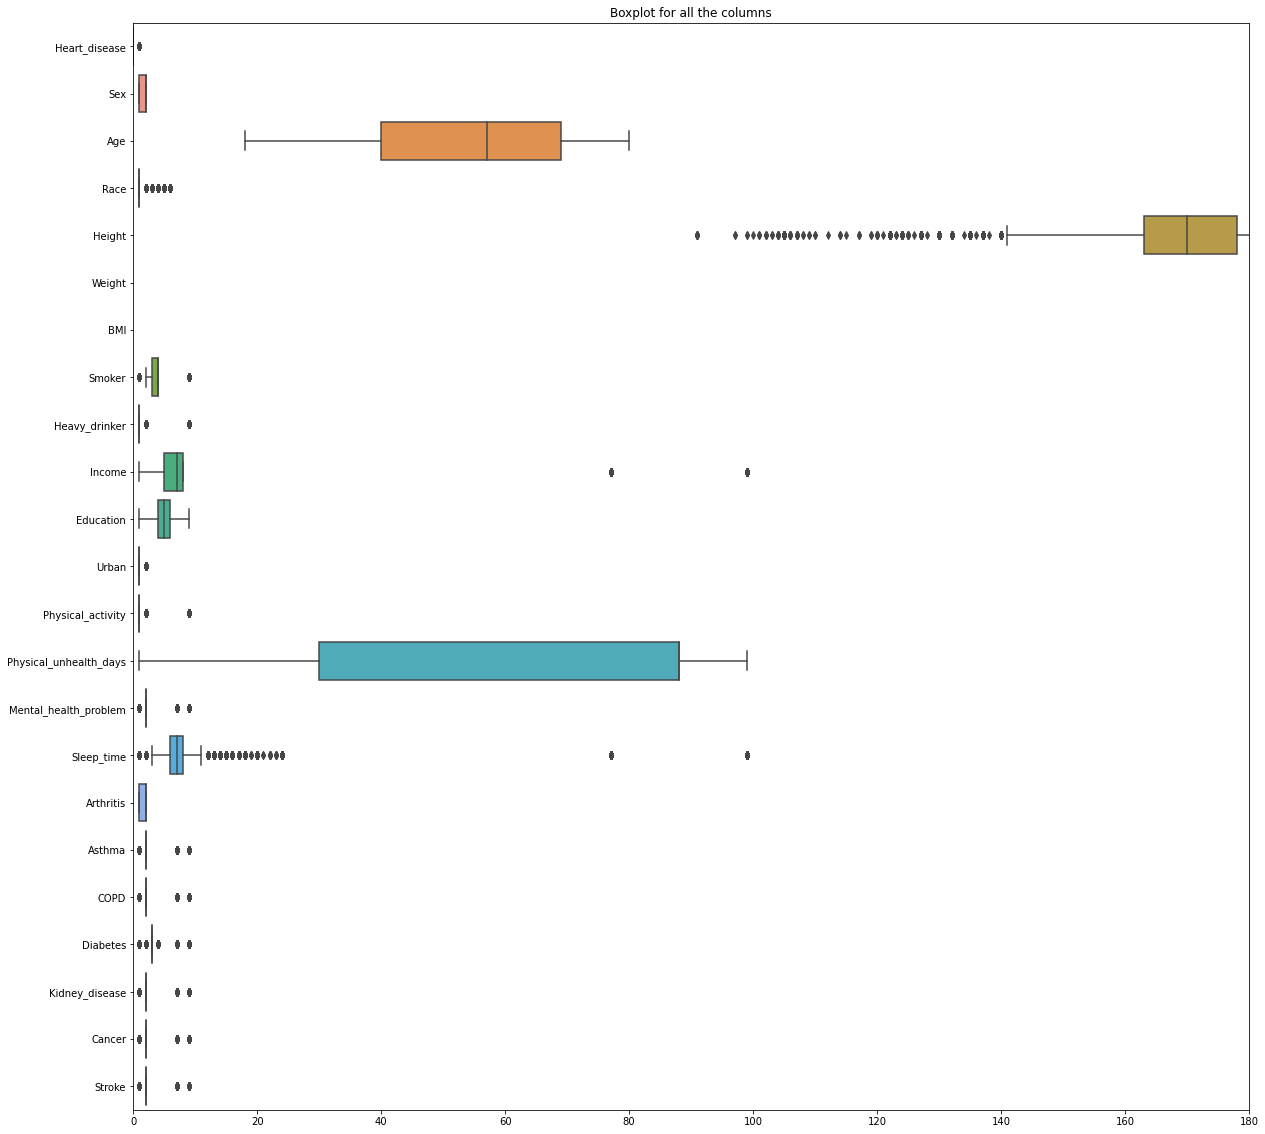

In [40]:
# Visualize all the columns
plt.figure(figsize=(20,20))
sns.boxplot(data=df_no_null, orient='h')
plt.title('Boxplot for all the columns')
plt.xlim(0,180)
plt.show()

From the above visualization, we can see beautiful outliers in most of the columns. 

In the next step, we'll separate the columns into continuous and categorical variables and address them separately.

In [41]:
# Put continuous columns into numeric_col_list and categorical columns into categorical_col_list
numeric_col_list = ['Age','Height','Weight','BMI','Sleep_time','Physical_unhealth_days']
categorical_col_list = ['Heart_disease','Sex','Race', 'Smoker','Heavy_drinker', 'Income', 'Education','Urban','Arthritis','Physical_activity',
 'Mental_health_problem', 'Asthma','COPD','Diabetes', 'Kidney_disease', 'Cancer', 'Stroke']
# Create new copies of dataframe for numeric and category respectively  
df_number = df_no_null[numeric_col_list].copy()
df_categorical = df_no_null[categorical_col_list].copy().astype(int)

#### define 

In [42]:
# Look at the first few rows
df_number.head()

,Age,Height,Weight,BMI,Sleep_time,Physical_unhealth_days
0,56,170.0,4808.0,1660.0,5.0,3.0
1,65,163.0,7711.0,2918.0,7.0,88.0
4,80,168.0,5715.0,2034.0,7.0,88.0
5,66,175.0,8165.0,2658.0,8.0,20.0
6,75,168.0,6804.0,2421.0,6.0,88.0


From the codebook, we know the "Age", "Height","Weight" and "BMI" don't have uncertain values after dropping all the NaN. However, "Sleep_time" and "Physical_unhealthy_days" have uncertain values like "77","88" and "99". We'll deal with them.

In [43]:
# Convert the Weight and BMI to international standard unit
df_number["Weight"] = df_number["Weight"]/100
df_number["BMI"] =df_number["BMI"]/100

Below, the `.describe()` function will be used to look at the various summary statistics for the dataset. The method looks at any numerical columns and gives some summary statistics such as the mean, standard deviation (std) and inter-quartile range among others. These statistics can give a wholistic view of what's contained in each column.

In [44]:
# Use the describe function to gain an understanding of numerical columns in the dataframe
df_number.describe()

,Age,Height,Weight,BMI,Sleep_time,Physical_unhealth_days
count,349294.000000,349294.000000,349294.000000,349294.000000,349294.000000,349294.000000
mean,54.644572,170.462063,82.504932,28.299422,7.776518,65.859399
std,17.731047,10.727167,20.975580,6.380059,7.137887,35.001093
min,18.000000,91.000000,24.950000,12.020000,1.000000,1.000000
25%,40.000000,163.000000,68.040000,23.990000,6.000000,30.000000
50%,57.000000,170.000000,79.380000,27.320000,7.000000,88.000000
75%,69.000000,178.000000,92.990000,31.380000,8.000000,88.000000
max,80.000000,239.000000,290.300000,98.430000,99.000000,99.000000


The describe is useful for fill our "uncertain" values, like "77", "88", "99", "999". 

And we'll further plot the distribution of columns.

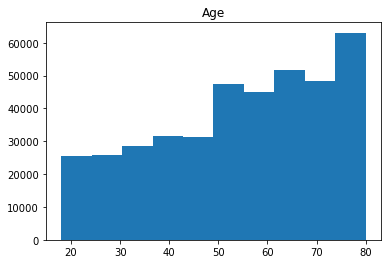

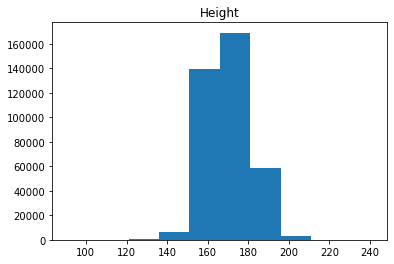

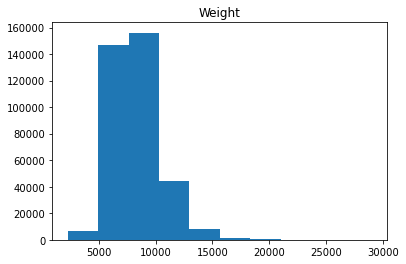

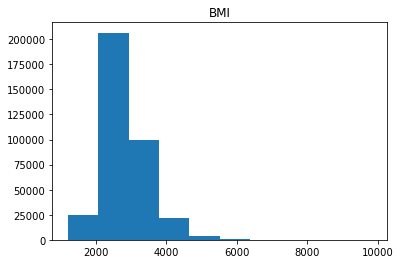

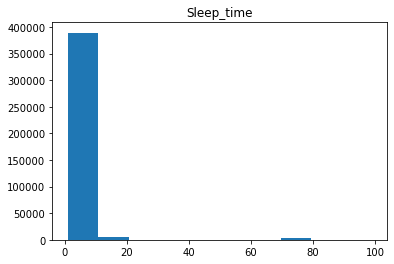

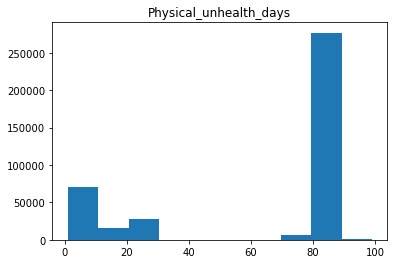

In [45]:
# Run the for loop to plot the distribution of numerical columns 
for column in df_number.columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

For the above visualizations:

- We can see that "Weight", "Height", and "BMI" are normally distributed. 

- The "Age" is almost evenly distributed. 

- The "Sleep_time" and "Physical_healthy_days" are skewed.


In [46]:
# Check the number of "Sleep_time"
df_number['Sleep_time'].value_counts()

8.0     105599
7.0     104719
6.0      72026
5.0      20973
9.0      17499
10.0      8654
4.0       8581
77.0      2951
12.0      2489
3.0       2268
2.0        921
1.0        627
11.0       496
99.0       332
16.0       275
14.0       273
15.0       219
18.0       121
13.0       116
20.0        76
24.0        35
17.0        23
22.0         9
23.0         6
19.0         4
21.0         2
Name: Sleep_time, dtype: int64

The "77" and "99" are the "uncertain" values( we can know them from the codebook as well), we'll fill them.
As the mean and median values are close, we will fill them with mean, which is 7.

In [47]:
# Fill missing value of "Sleep_time" with median(mean and median are close)
df_number.loc[df_number['Sleep_time']==99,"Sleep_time"]=7
df_number.loc[df_number['Sleep_time']==77,"Sleep_time"]=7
# Check the number of "Sleep_time" in the dataset
df_number['Sleep_time'].value_counts()

7.0     108002
8.0     105599
6.0      72026
5.0      20973
9.0      17499
10.0      8654
4.0       8581
12.0      2489
3.0       2268
2.0        921
1.0        627
11.0       496
16.0       275
14.0       273
15.0       219
18.0       121
13.0       116
20.0        76
24.0        35
17.0        23
22.0         9
23.0         6
19.0         4
21.0         2
Name: Sleep_time, dtype: int64

<AxesSubplot:ylabel='Frequency'>

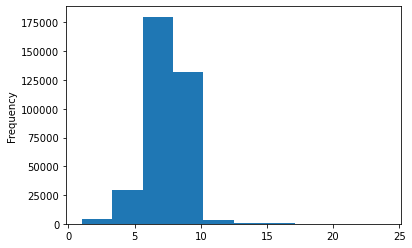

In [74]:
df_number["Sleep_time"].plot(kind='hist')

The "77", "88" and "99" are the "uncertain" values( we can know them from the codebook as well), we'll fill them. As the mean and median values are close, we will fill them with mean, which is 7.

We will address 'Physical_unhealth_days' subsequently.

In [48]:
# Check the number of "Physical_unhealth_days" in the dataset
df_number['Physical_unhealth_days'].value_counts()

88.0    241663
30.0     21696
2.0      15888
1.0      11158
3.0       9189
5.0       8131
10.0      5876
77.0      5716
15.0      5437
7.0       4972
4.0       4796
20.0      3502
14.0      3132
6.0       1351
25.0      1278
99.0      1148
8.0        992
21.0       660
12.0       645
28.0       493
29.0       235
9.0        199
18.0       190
16.0       147
27.0       144
17.0       116
13.0       106
22.0        98
11.0        93
24.0        78
26.0        76
23.0        52
19.0        37
Name: Physical_unhealth_days, dtype: int64

Text(0.5, 1.0, 'Distribution of Physical_unhealth_days')

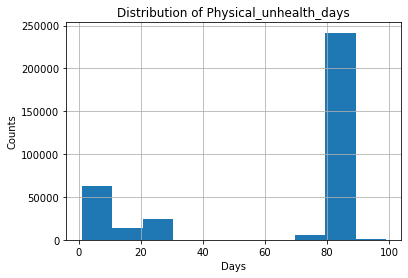

In [49]:
# Plot the distribution of 'Physical_unhealth_days'
df_number['Physical_unhealth_days'].hist()
plt.xlabel("Days")
plt.ylabel("Counts")
plt.title("Distribution of Physical_unhealth_days")

In [50]:
# Reset the value 88 of 'Physical_unhealth_days' to 0 
df_number.loc[df_number['Physical_unhealth_days']==88,'Physical_unhealth_days'] = 0


From the codebook, we know "88" means none days during the past 30 days that physical health is not good. So I set the value "88" to 0.

"99" and "77" mean "don't know/not sure" or "refused".

After setting "88" to 0 and rerun the histplot above, we can see the distribution is right skewed. So we'll set "99" and "77" to the median, which is 0.

Text(0.5, 1.0, 'Distribution of Physical_unhealth_days')

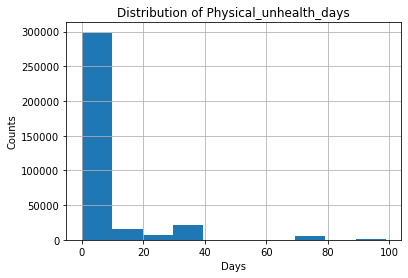

In [51]:
# Plot the distribution of 'Physical_unhealth_days' after reset "88" to 0
df_number['Physical_unhealth_days'].hist()
plt.xlabel("Days")
plt.ylabel("Counts")
plt.title("Distribution of Physical_unhealth_days")

In [52]:
# Reset the value "77" and "99" to 0 
df_number.loc[df_number['Physical_unhealth_days']==77,'Physical_unhealth_days'] =0
df_number.loc[df_number['Physical_unhealth_days']==99,'Physical_unhealth_days'] =0

In [53]:
# Confirm resetting the values
df_number['Physical_unhealth_days'].value_counts()

0.0     248527
30.0     21696
2.0      15888
1.0      11158
3.0       9189
5.0       8131
10.0      5876
15.0      5437
7.0       4972
4.0       4796
20.0      3502
14.0      3132
6.0       1351
25.0      1278
8.0        992
21.0       660
12.0       645
28.0       493
29.0       235
9.0        199
18.0       190
16.0       147
27.0       144
17.0       116
13.0       106
22.0        98
11.0        93
24.0        78
26.0        76
23.0        52
19.0        37
Name: Physical_unhealth_days, dtype: int64

In [54]:
# Use the describe check the cleaned numerical columns
df_number.describe()

,Age,Height,Weight,BMI,Sleep_time,Physical_unhealth_days
count,349294.000000,349294.000000,349294.000000,349294.000000,349294.000000,349294.000000
mean,54.644572,170.462063,82.504932,28.299422,7.097680,3.390167
std,17.731047,10.727167,20.975580,6.380059,1.449235,8.001846
min,18.000000,91.000000,24.950000,12.020000,1.000000,0.000000
25%,40.000000,163.000000,68.040000,23.990000,6.000000,0.000000
50%,57.000000,170.000000,79.380000,27.320000,7.000000,0.000000
75%,69.000000,178.000000,92.990000,31.380000,8.000000,2.000000
max,80.000000,239.000000,290.300000,98.430000,24.000000,30.000000


 ### EDA

We'll plot the correlation of the numerical variables using heatmap.

<AxesSubplot:>

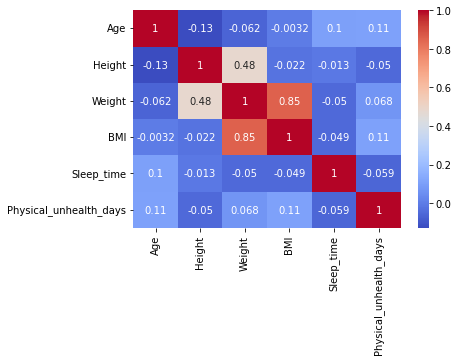

In [55]:
# Correlation of the variables in a heatmap
sns.heatmap(df_number.corr(),cmap='coolwarm',annot=True)

From the heatmap, we can see the "Height", "Weight" and "BMI" are strongly correlated. So to avoid multi-collinearity, we'll drop the "Weight", as it's correlated with both the "Height" and "BMI". 

In [56]:
df_number = df_number.drop(columns='Weight')
df_number

,Age,Height,BMI,Sleep_time,Physical_unhealth_days
0,56,170.0,16.60,5.0,3.0
1,65,163.0,29.18,7.0,0.0
4,80,168.0,20.34,7.0,0.0
5,66,175.0,26.58,8.0,20.0
6,75,168.0,24.21,6.0,0.0
...,...,...,...,...,...
394826,55,145.0,23.80,5.0,30.0
394827,62,185.0,35.62,12.0,18.0
394828,80,163.0,27.46,9.0,0.0
394829,45,160.0,22.14,6.0,7.0


Now we will explore the categorical columns and visual the relation of each column with "Heart_disease".

In [57]:
# Check the target
df_categorical['Heart_disease'].value_counts()

0    318356
1     30938
Name: Heart_disease, dtype: int64

Columns ('Mental_health_problem', 'Asthma', 'COPD', 'Diabetes', 'Kidney_disease', 'Cancer' and 'Stroke') have the same value of 7 ( "don't know/not sure" ) and 9 ("refused"). We'll put 7 and 9 into one group. 

"Income" (labeled 77 and 99) has the same meaning. We'll set these two labels into one.

"Sex" has 2 labels (1 and 2), we'll set the value 2 to 0, so "sex" is binary.

In [58]:
# Generate a for loop to reset the value of '7' to '9'
for column in ['Mental_health_problem','Asthma','COPD','Diabetes','Kidney_disease','Cancer','Stroke']:
    df_categorical.loc[df_categorical[column]==7,column]=9

In [59]:
# Convert the Income from 77 to 99
df_categorical.loc[df_categorical['Income']==77,'Income'] =99

In [60]:
# Vonvert the Sex from 2 to 0
df_categorical.loc[df_categorical['Sex']==2,'Sex']=0

Heart_disease,0,1
Heart_disease,,
0,1.0,NaN
1,NaN,1.0


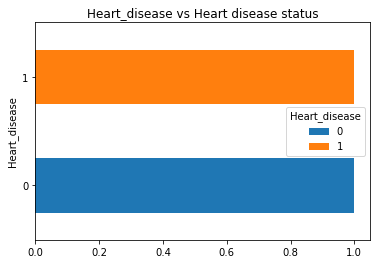

Heart_disease,0,1
Sex,,
0,0.930142,0.069858
1,0.891023,0.108977


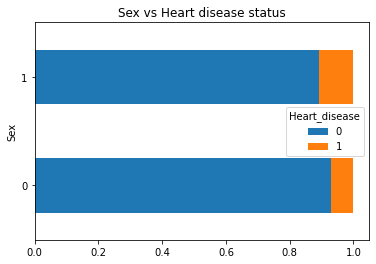

Heart_disease,0,1
Race,,
1,0.905335,0.094665
2,0.921353,0.078647
3,0.967726,0.032274
4,0.893617,0.106383
5,0.950285,0.049715
6,0.913660,0.086340


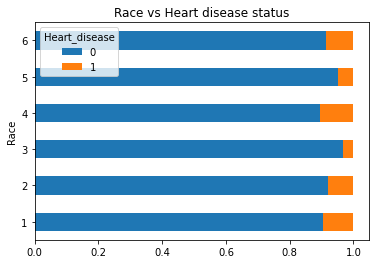

Heart_disease,0,1
Smoker,,
1,0.892293,0.107707
2,0.902244,0.097756
3,0.864769,0.135231
4,0.937615,0.062385
9,0.914141,0.085859


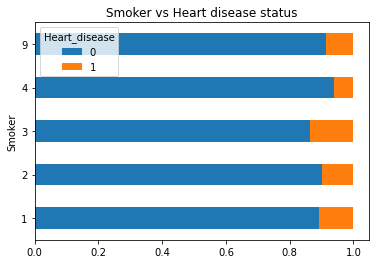

Heart_disease,0,1
Heavy_drinker,,
1,0.908613,0.091387
2,0.945828,0.054172
9,0.918146,0.081854


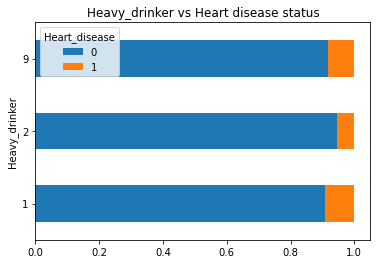

Heart_disease,0,1
Income,,
1,0.869041,0.130959
2,0.838342,0.161658
3,0.863745,0.136255
4,0.873939,0.126061
5,0.886983,0.113017
6,0.907159,0.092841
7,0.923063,0.076937
8,0.947248,0.052752
99,0.901054,0.098946


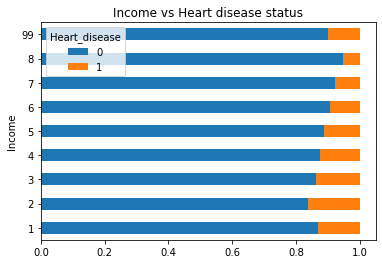

Heart_disease,0,1
Education,,
1,0.882175,0.117825
2,0.839670,0.160330
3,0.862235,0.137765
4,0.896210,0.103790
5,0.906596,0.093404
6,0.933823,0.066177
9,0.898876,0.101124


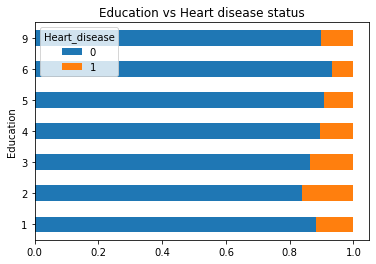

Heart_disease,0,1
Urban,,
1,0.915045,0.084955
2,0.891146,0.108854


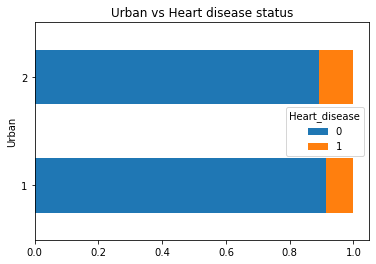

Heart_disease,0,1
Arthritis,,
1,0.839347,0.160653
2,0.944611,0.055389


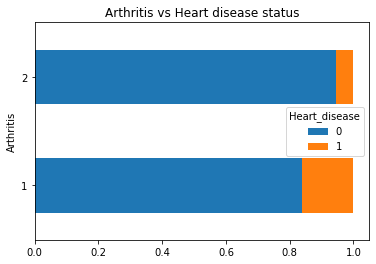

Heart_disease,0,1
Physical_activity,,
1,0.927349,0.072651
2,0.858113,0.141887
9,0.833689,0.166311


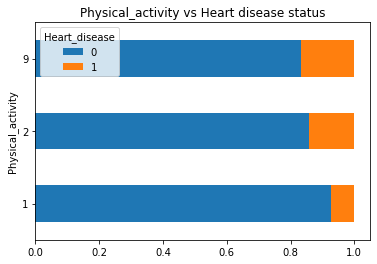

Heart_disease,0,1
Mental_health_problem,,
1,0.888183,0.111817
2,0.917029,0.082971
9,0.902963,0.097037


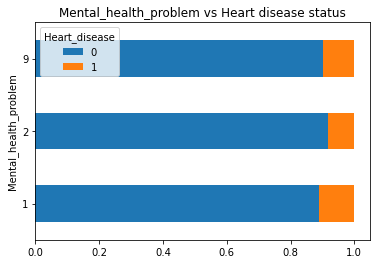

Heart_disease,0,1
Asthma,,
1,0.880703,0.119297
2,0.916300,0.083700
9,0.873960,0.126040


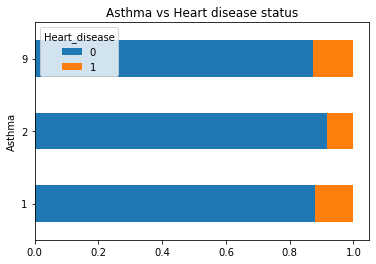

Heart_disease,0,1
COPD,,
1,0.732429,0.267571
2,0.927500,0.072500
9,0.782609,0.217391


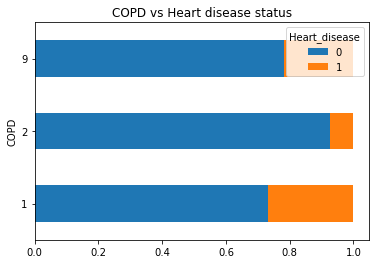

Heart_disease,0,1
Diabetes,,
1,0.776264,0.223736
2,0.956000,0.044000
3,0.932535,0.067465
4,0.880607,0.119393
9,0.906593,0.093407


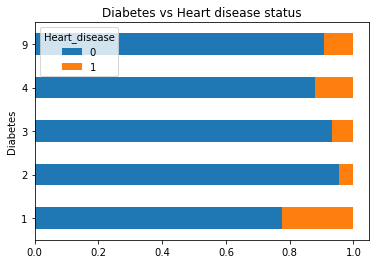

Heart_disease,0,1
Kidney_disease,,
1,0.698867,0.301133
2,0.920155,0.079845
9,0.752916,0.247084


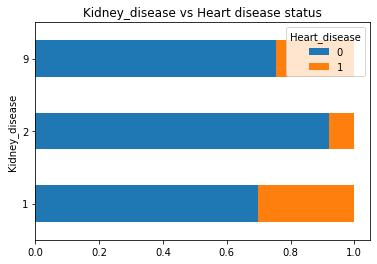

Heart_disease,0,1
Cancer,,
1,0.829906,0.170094
2,0.920076,0.079924
9,0.810015,0.189985


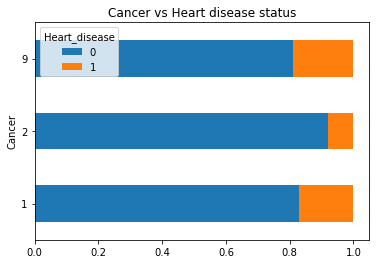

Heart_disease,0,1
Stroke,,
1,0.634567,0.365433
2,0.923263,0.076737
9,0.715856,0.284144


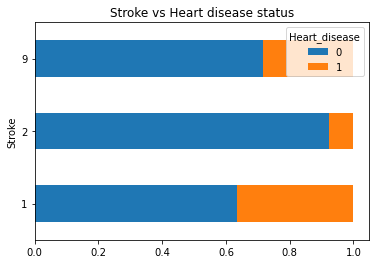

In [61]:
# Run a for loop to get the percentage of each column group by "Heart_disease"
for column in categorical_col_list:
    total_count = df_categorical.groupby([column, "Heart_disease"])[column].count()
    pct = total_count/df_categorical.groupby(column)[column].count()

    pct = pct.unstack()

    display(pct)
# Instantiate the plot
    pct.plot(kind='barh', stacked=True)
    
    plt.title(f"{column} vs Heart disease status")
    plt.show()

From the visualization above:

    - Sex: class 1(check the codebook which is male) has a high percentage of heart disease. 
    
    - Smoker: class 4(never smoke) has the lowest percentage of heart disease.
    
    - Heavy_drinker: class 2(heavy drinker) has a low percentage of heart disease.  #???
    
    - Income & Education: in general,the higher the salary or education level, the less like to be attacked by heart disease.
    
    - Arthritis & Mental_health_problem & COPD & Diabetes & Kidney_disease & Cancer: people others disease are likely to attacked by heart disease. 
    
    - Physical_activity: exercise plays a positive role to avoid heart disease.
    
The meaning of each column' value is as below.

| Numerical columns    | Meaning                                                                                                                                                                                                                                                                                             |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Age                  | Imputed Age value collapsed above 80                                                                                                                                                                                                                                                                |
| Height               | Reported height in meters                                                                                                                                                                                                                                                                           |
| BMI                  | Body Mass Index (BMI)                                                                                                                                                                                                                                                                               |
| Sleep_time           | On average, how many hours of sleep do you get in a 24-hour period?                                                                                                                                                                                                                                 |
| Physical_unhealth_days | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?                                                                                                                                   |
| **Categorical columns**  |                                                                                                                                                                                                                                                                                                     |
| Heart_disease        | 0 no heart disease 1 heart disease                                                                                                                                                                                                                                                                  |
| Sex                  | 0 female 1 male                                                                                                                                                                                                                                                                                     |
| Race                 | 1 White, Non-Hispanic  2 Black, Non-Hispanic  3 Asian, Non-Hispanic  4 American Indian/Alaskan Native, Non-Hispanic  5 Hispanic  6 Other race, Non-Hispanic                                                                                                                                         |
| Smoker               | 1 Current smoker -now smokes every day  2 Current smoker -now smokes some days  3 Former smoker  4 Never smoked  9 Don't know/Refused/Missing                                                                                                                                                       |
| Heavy_drinker        | 1 No  2 Yes  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Income               | 1)   < $10,000;  2)   $10,000 ~ $15,000;  3)   $15,000 ~ $20,000;  4)   $20,000 ~ $25,000;  5)   $25,000 ~ $35,000;  6)   $35,000 ~ $50,000;  7)   $50,000 ~ $75,000;  8)   >$75,000;                                                                                                               |
| Education            | 1) Never attended school or only kindergarten  2) Grades 1 through 8 (Elementary)  3) Grades 9 through 11 (Some high school)  4) Grade 12 or GED (High school graduate)  5) College 1 year to 3 years (Some college or technical school)  6) College 4 years or more (College graduate)  9) Refused |
| Urban                | 1 Urban counties  2 Rural counties                                                                                                                                                                                                                                                                  |
| Arthritis            | 1 Diagnosed with arthritis  2 Not diagnosed with arthritis                                                                                                                                                                                                                                          |
| Physical_activity    | 1 Had physical activity or exercise during past 30 days other than their regular job  2 No physical activity or exercise in last 30 days  9 Don't know/Refused/Missing                                                                                                                              |
| Mental_health_problem:       | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Asthma:              | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| COPD                 | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Diabetes             | 1 Yes  2 Yes, but female told only during pregnancy  3 No  4 No, pre-diabetes or borderline diabetes  9 Don't know/Refused/Missing                                                                                                                                                                  |
| Kidney_disease       | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Cancer               | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Stroke               | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |

### Applying get_dummies to convert the categorical columns


In [62]:
# Create a for loop to check the class of each category
for column in df_categorical.columns:
    print(f'{column}: {df_categorical[column].unique()}')

Heart_disease: [0 1]
Sex: [0 1]
Race: [1 2 3 4 6 5]
Smoker: [1 9 4 3 2]
Heavy_drinker: [1 9 2]
Income: [ 1 99  5  6  7  4  2  8  3]
Education: [6 4 2 5 3 9 1]
Urban: [1 2]
Arthritis: [1 2]
Physical_activity: [1 2 9]
Mental_health_problem: [1 2 9]
Asthma: [1 2 9]
COPD: [1 2 9]
Diabetes: [1 3 4 2 9]
Kidney_disease: [2 1 9]
Cancer: [1 2 9]
Stroke: [2 1 9]


Because columns "Heart_disease" and "Sex" are already binary, we'll applying get dummy to convert all the categorical columns into dummy variables except "Heart_disease" and "Sex" .

Normally, "get_dummies" was performed after train_test_split, but in my case I will "get_dummies" before train_test_split because I won't change the data any more.

In [63]:
# Create a new dataframe without 'Heart_disease' and 'Sex' columns
df_categorical2= df_categorical.drop(columns=['Heart_disease','Sex'])

In [64]:
# Applying get_dummies to convert the categorical columns
df_categorical2_trans = pd.get_dummies(df_categorical2.astype(str))
df_categorical2_trans.head()

,Race_1,Race_2,Race_3,Race_4,Race_5,Race_6,Smoker_1,Smoker_2,Smoker_3,Smoker_4,...,Diabetes_9,Kidney_disease_1,Kidney_disease_2,Kidney_disease_9,Cancer_1,Cancer_2,Cancer_9,Stroke_1,Stroke_2,Stroke_9
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
6,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [65]:
# Print all the dummy variables name to a list
print(df_categorical2_trans.columns.to_list())

['Race_1', 'Race_2', 'Race_3', 'Race_4', 'Race_5', 'Race_6', 'Smoker_1', 'Smoker_2', 'Smoker_3', 'Smoker_4', 'Smoker_9', 'Heavy_drinker_1', 'Heavy_drinker_2', 'Heavy_drinker_9', 'Income_1', 'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8', 'Income_99', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Education_9', 'Urban_1', 'Urban_2', 'Arthritis_1', 'Arthritis_2', 'Physical_activity_1', 'Physical_activity_2', 'Physical_activity_9', 'Mental_health_problem_1', 'Mental_health_problem_2', 'Mental_health_problem_9', 'Asthma_1', 'Asthma_2', 'Asthma_9', 'COPD_1', 'COPD_2', 'COPD_9', 'Diabetes_1', 'Diabetes_2', 'Diabetes_3', 'Diabetes_4', 'Diabetes_9', 'Kidney_disease_1', 'Kidney_disease_2', 'Kidney_disease_9', 'Cancer_1', 'Cancer_2', 'Cancer_9', 'Stroke_1', 'Stroke_2', 'Stroke_9']


After applying `get_dummies`, we'll drop one of the columns in each column category, otherwise there maybe multi-collinearity.

We'll drop the last column of each category because these columns mean "missing/unknown/refused".

In [66]:
# Put the columns to be dropped into a list
columns_to_drop = ['Race_6','Smoker_9', 'Heavy_drinker_9','Income_99','Education_9','Urban_2','Arthritis_2','Physical_activity_9','Mental_health_problem_9','Asthma_9','COPD_9', 'Diabetes_9','Kidney_disease_9','Cancer_9','Stroke_9']

In [67]:
# Drop the columns in the above list
df_categorical2_trans= df_categorical2_trans.drop(columns=columns_to_drop)
df_categorical2_trans

,Race_1,Race_2,Race_3,Race_4,Race_5,Smoker_1,Smoker_2,Smoker_3,Smoker_4,Heavy_drinker_1,...,Diabetes_1,Diabetes_2,Diabetes_3,Diabetes_4,Kidney_disease_1,Kidney_disease_2,Cancer_1,Cancer_2,Stroke_1,Stroke_2
0,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
4,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,1,0,1,1,0
5,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1
6,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394826,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
394827,1,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,1,0,0,1
394828,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,1,1,0,1,0
394829,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1


In [68]:
df_categorical[['Heart_disease','Sex']]

,Heart_disease,Sex
0,0,0
1,0,0
4,0,0
5,0,1
6,0,0
...,...,...
394826,0,0
394827,0,1
394828,0,0
394829,0,1


In [69]:
# Concatenate the transformed numerical dataframe and categorical dataframe
frames = [df_number,df_categorical[['Heart_disease','Sex']],df_categorical2_trans]
df_clean = pd.concat(frames,axis=1)

In [70]:
# Check the first rows of the cleaned dataframe
df_clean.head()

,Age,Height,BMI,Sleep_time,Physical_unhealth_days,Heart_disease,Sex,Race_1,Race_2,Race_3,...,Diabetes_1,Diabetes_2,Diabetes_3,Diabetes_4,Kidney_disease_1,Kidney_disease_2,Cancer_1,Cancer_2,Stroke_1,Stroke_2
0,56,170.0,16.60,5.0,3.0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
1,65,163.0,29.18,7.0,0.0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,80,168.0,20.34,7.0,0.0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,1,0
5,66,175.0,26.58,8.0,20.0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,1
6,75,168.0,24.21,6.0,0.0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1


In [73]:
# Export cleaned data to a file
df_clean.to_csv('heart_disease_clean.csv')

**The next part of is modeling.** 